In [1]:
from markov import (MarkovChain, 
                    MarkovChainState, 
                    MarkovChainEdge
                   )
import numpy as np
from matplotlib import pyplot
from scipy import sparse
import jgraph

# Drunkard's Walk

This section is on the drunkard's walk, which is a coloquial name given to a simple random walk.  

## Definition of transition matrix and initial distribution

In [2]:
# Number of states
n = 9
# Probability of stepping right (hence 1-p is the probability of stepping left)
p = .5

# Define transition matrix
P = np.zeros((n,n))
P[0,0] = 1
P[n-1,n-1] = 1
for i in range(1,n-1):
    P[i,i-1] = 1-p
    P[i,i+1] = p

# Define initial distribution
pi = np.zeros(n)
pi[int(n/2)] = 1

print('Transition matrix:')
print('P = ' + str(P) + '\n')

print('Initial distribution:')
print('pi = ' + str(pi))

Transition matrix:
P = [[1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]

Initial distribution:
pi = [0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [3]:
rows,cols = np.where(P)
rows = list(rows)
cols = list(cols)
vals = [P[i,j] for i,j in zip(rows,cols)]


In [4]:
mc = MarkovChain()

for i in range(n):
    mc.add_state(state_name=f'State {i}')

for r,c,v in zip(rows,cols,vals):
    mc.add_edge(orig_state=mc.states.get(r),term_state=mc.states.get(c),transition_prob=v)


In [6]:
mc.get_communication_classes()

([[1, 2, 3, 4, 5, 6, 7], [0], [8]], ['Transient', 'Absorbing', 'Absorbing'])

## Simulations of the drunkard's walk

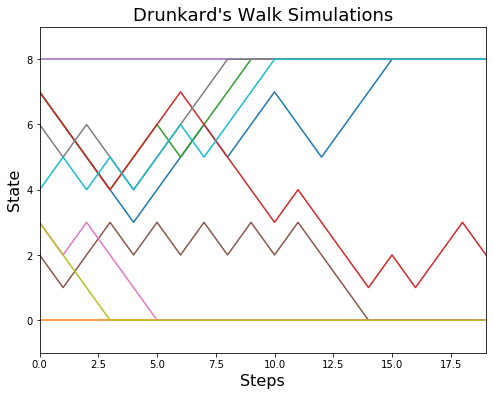

In [9]:
# P, n, and pi are carried over from the previous cell

# Number of simulations
num_sims = 10

# Number of steps simulated
num_steps = 20

RW = MarkovChain()
RW.from_nparray(P)
pyplot.figure(figsize=(8,6))
for i in range(num_sims):
    x = RW.simulate(n=num_steps,initial=pi)
    pyplot.plot(x)
pyplot.xlim([0,num_steps-1])
pyplot.ylim([-1,n])
pyplot.xlabel('Steps',fontsize=16)
pyplot.ylabel('State',fontsize=16)
pyplot.title("Drunkard's Walk Simulations",fontsize=18)
pyplot.show()


## Drunkard's walk on a doubly infinite sample space

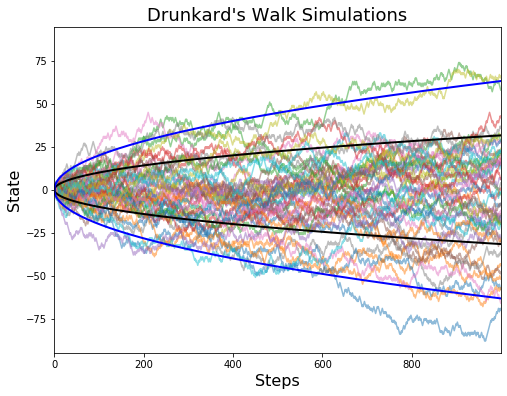

In [10]:
# Probability of stepping to the right
p = .5

# Number of simulations
num_sims = 50

# Number of steps simulated
num_steps = 1000

# Simulate random walk
pyplot.figure(figsize=(8,6))
for i in range(num_sims):
    r = np.random.choice(a=[-1,1],size=num_steps,p=[1-p,p])
    x = np.cumsum(r)
    pyplot.plot(x,alpha=.5)
    
# Plot Markov chain standard deviation in black, twice the deviation in blue
x_domain = np.array(list(range(num_steps)))
pyplot.plot(x_domain,x_domain**.5,linewidth=2,color='black')
pyplot.plot(x_domain,-x_domain**.5,linewidth=2,color='black')
pyplot.plot(x_domain,2*x_domain**.5,linewidth=2,color='blue')
pyplot.plot(x_domain,-2*x_domain**.5,linewidth=2,color='blue')
pyplot.xlim([0,num_steps-1])
pyplot.ylim([-3*num_steps**.5,3*num_steps**.5])
pyplot.xlabel('Steps',fontsize=16)
pyplot.ylabel('State',fontsize=16)
pyplot.title("Drunkard's Walk Simulations",fontsize=18)
#pyplot.savefig('your filepath and filename here.png',bbox_inches='tight')
pyplot.show()



# Gambler's Ruin
This section is about absorbing/transient states, absorption probability/times, and the gambler's ruin example.

## Simulations of the gamblers ruin

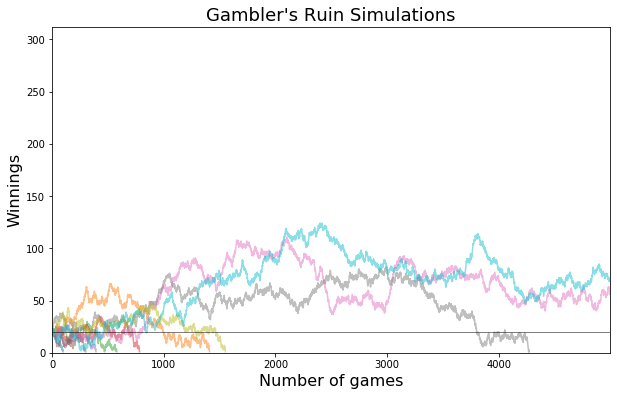

In [11]:
# Probability of stepping to the right
p = .5

# Number of simulations
num_sims = 10

# Number of steps simulated
num_games = 5000

# Initial amount of money
initial_balance = 20

# Plot simulations
pyplot.figure(figsize=(10,6))
for i in range(num_sims):
    r = np.random.choice(a=[-1,1],size=num_games,p=[1-p,p])
    x = np.cumsum(r) + initial_balance
    if 0 in x:
        x = x[:np.where(x==0)[0][0]]
    pyplot.plot(x,alpha=.5)
pyplot.plot([0,num_games],[initial_balance,initial_balance],'k-',linewidth=.5)
pyplot.xlim([0,num_games-1])
pyplot.ylim([0,100+3*num_games**.5])
pyplot.xlabel('Number of games',fontsize=16)
pyplot.ylabel('Winnings',fontsize=16)
pyplot.title("Gambler's Ruin Simulations",fontsize=18)
#pyplot.savefig('your filepath and filename.png',bbox_inches='tight')
pyplot.show()



In [12]:
# Number of states
n = 9

# Probability of stepping to the right
p = .5

# Define transition matrix
P = np.zeros((n,n))
P[0,0] = 1
P[n-1,n-1] = 1
for i in range(1,n-1):
    P[i,i-1] = 1-p
    P[i,i+1] = p

# Define initial distribution
pi = np.zeros(n)
pi[int(n/2)] = 1

# Create Markov chain object and compute relevant quantities
RW = MarkovChain()
RW.from_nparray(P)

RW.get_communication_classes()
RW.get_transition_matrix_decomposition()
RW.get_canonical_transition_matrix()
RW.get_expected_visits_matrix()
RW.get_absorption_probability_matrix()
RW.get_expected_time_to_absorption_matrix()


print('Transition matrix: ' + str(RW.csr_transition_matrix.todense()) + '\n')
print('Communication classes: ' + str(RW.classes) + '\n')
print('Communication classe types: ' + str(RW.types) + '\n')

print('Fundamental matrix (expected number of visits)')
print('N = ' + str(RW.N.todense()) + '\n')
print('Probability of absorption')
print('B = ' + str(RW.B.todense()) + '\n')
print('Expected absorption times')
print('T = ' + str(RW.T.todense()) + '\n')
print('Full canonical matrix')
print('A = ' + str(RW.canonical_transition_matrix.todense()) + '\n')

Transition matrix: [[1.  0.  0.  0.  0.  0.  0.  0.  0. ]
 [0.5 0.  0.5 0.  0.  0.  0.  0.  0. ]
 [0.  0.5 0.  0.5 0.  0.  0.  0.  0. ]
 [0.  0.  0.5 0.  0.5 0.  0.  0.  0. ]
 [0.  0.  0.  0.5 0.  0.5 0.  0.  0. ]
 [0.  0.  0.  0.  0.5 0.  0.5 0.  0. ]
 [0.  0.  0.  0.  0.  0.5 0.  0.5 0. ]
 [0.  0.  0.  0.  0.  0.  0.5 0.  0.5]
 [0.  0.  0.  0.  0.  0.  0.  0.  1. ]]

Communication classes: [[1, 2, 3, 4, 5, 6, 7], [0], [8]]

Communication classe types: ['Transient', 'Absorbing', 'Absorbing']

Fundamental matrix (expected number of visits)
N = [[1.75 1.5  1.25 1.   0.75 0.5  0.25]
 [1.5  3.   2.5  2.   1.5  1.   0.5 ]
 [1.25 2.5  3.75 3.   2.25 1.5  0.75]
 [1.   2.   3.   4.   3.   2.   1.  ]
 [0.75 1.5  2.25 3.   3.75 2.5  1.25]
 [0.5  1.   1.5  2.   2.5  3.   1.5 ]
 [0.25 0.5  0.75 1.   1.25 1.5  1.75]]

Probability of absorption
B = [[0.875 0.125]
 [0.75  0.25 ]
 [0.625 0.375]
 [0.5   0.5  ]
 [0.375 0.625]
 [0.25  0.75 ]
 [0.125 0.875]]

Expected absorption times
T = [[ 7.]
 [12.]
 

## Gambler's ruin with walk-away exit strategy simulations

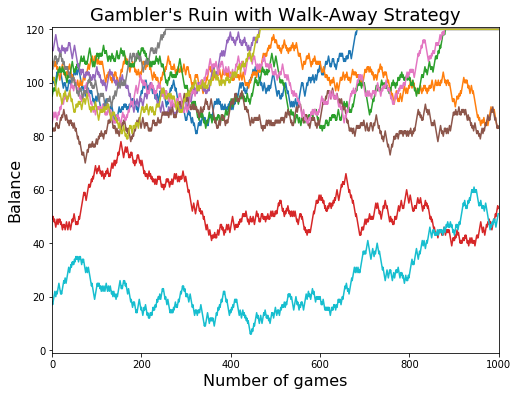

In [13]:
# Probability of winning
p = .5

# Initial amount of money
initial_balance = 20

# Number of states
walk_away_num = 120

# Number of simulations
num_sims = 10

# Number of games to play
num_games = 1000


# Number of state in the model (broke, walk-away number, and all integers in-between)
n = walk_away_num + 1

# Define transition matrix
P = np.zeros((n,n))
P[0,0] = 1
P[n-1,n-1] = 1
for i in range(1,n-1):
    P[i,i-1] = 1-p
    P[i,i+1] = p

# Define initial distribution
pi = np.zeros(n)
pi[initial_balance] = 1

# Create Markov chain object and compute relevant quantities
RW = MarkovChain()
RW.from_nparray(P)

RW.get_communication_classes()
RW.get_transition_matrix_decomposition()
RW.get_canonical_transition_matrix()
RW.get_expected_visits_matrix()
RW.get_absorption_probability_matrix()
RW.get_expected_time_to_absorption_matrix()

pyplot.figure(figsize=(8,6))
for i in range(num_sims):
    x = RW.simulate(n=num_games,initial=pi)
    pyplot.plot(x)
pyplot.xlim([0,num_games])
pyplot.ylim([-1,n])
pyplot.xlabel('Number of games',fontsize=16)
pyplot.ylabel('Balance',fontsize=16)
pyplot.title("Gambler's Ruin with Walk-Away Strategy",fontsize=18)
pyplot.show()


## Gambler's ruin with walk-away exit strategy analysis

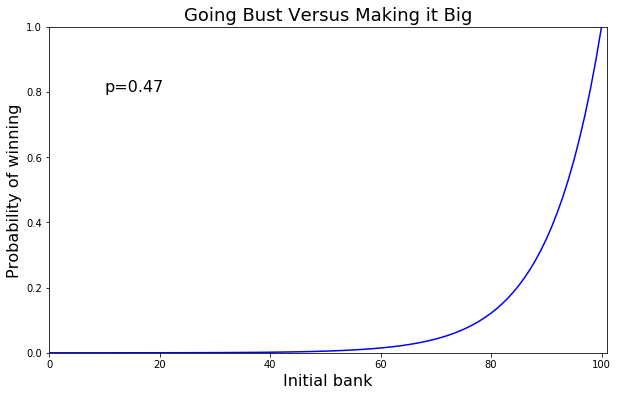

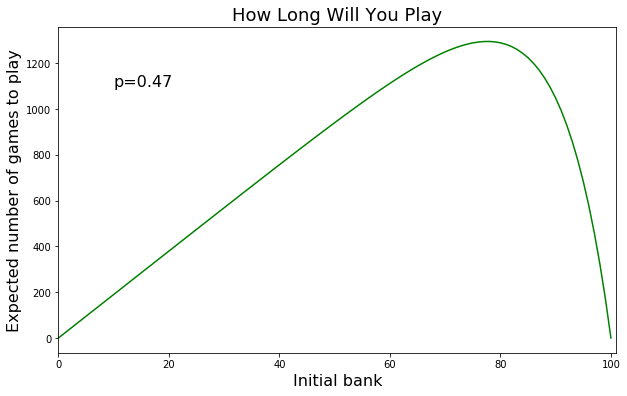

In [14]:
# Probability of winning
p = 18/38

# Number of states
walk_away_num = 100

# Number of games to play
num_games = 1000

# Number of state in the model (broke, walk-away number, and all integers in-between)
n = walk_away_num + 1

# Define transition matrix
P = np.zeros((n,n))
P[0,0] = 1
P[n-1,n-1] = 1
for i in range(1,n-1):
    P[i,i-1] = 1-p
    P[i,i+1] = p
pi = np.zeros(n)
pi[5] = 1

# Make Markov chain object
RW = MarkovChain()
RW.from_nparray(P)

RW.get_communication_classes()
RW.get_transition_matrix_decomposition()
RW.get_canonical_transition_matrix()
RW.get_expected_visits_matrix()
RW.get_absorption_probability_matrix()
RW.get_expected_time_to_absorption_matrix()

# Plot the probability of winning versus going bust for different initial balances
pyplot.figure(figsize=(10,6))
pyplot.plot(np.append(np.append(0,RW.B.getcol(1).todense()),1),color='blue')
pyplot.xlim([0,n])
pyplot.ylim([0,1])
pyplot.xlabel('Initial bank',fontsize=16)
pyplot.ylabel('Probability of winning',fontsize=16)
pyplot.text(x=10,y=.8,s='p=%.2f'%p,fontsize=16)
pyplot.title('Going Bust Versus Making it Big',fontsize=18)
#pyplot.savefig('your filepath and filename here.png',bbox_inches='tight')
pyplot.show()

# Plot the expected amount of time playing before winning or busting for different initial balances
pyplot.figure(figsize=(10,6))
pyplot.plot(np.append(np.append(0,np.array(RW.T.getcol(0).todense())[:,0]),0),color='green')
pyplot.xlim([0,n])
pyplot.xlabel('Initial bank',fontsize=16)
pyplot.ylabel('Expected number of games to play',fontsize=16)
pyplot.text(x=10,y=.85*max(np.array(RW.T.getcol(0).todense())[:,0]),s='p=%.2f'%p,fontsize=16)
pyplot.title('How Long Will You Play',fontsize=18)
#pyplot.savefig('your filepath and filename here.png',bbox_inches='tight')
pyplot.show()




# Google PageRank
This section is a demonstration of Markov chains on directed graphs and their applications to Google's PageRank algorithm.

## Represented directed graphs

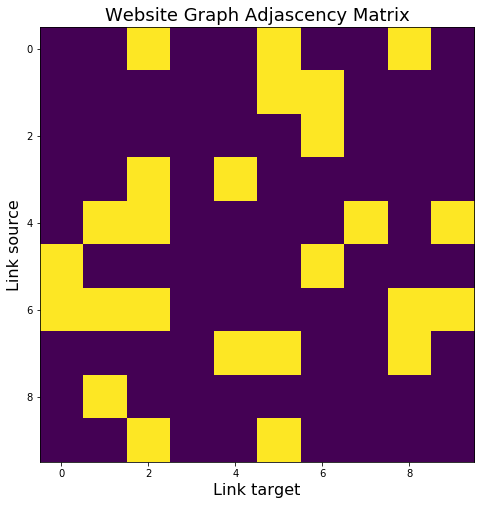

In [15]:
# Number of websites
n = 10

# Adjascency and transition matrices selected randomly
A = np.zeros((n,n))
def dist_func(x):
    return (1.+x)/(1.+x**2)
dist = [dist_func(x)/sum([dist_func(y) for y in range(1,n-1)]) for x in range(1,n-1)]
for i in range(n):
    links = np.random.choice(a=[j for j in range(n) if j != i],size=np.random.choice(a=range(1,n-1),size=1,p=dist))
    A[i,links] = [1]*len(links)
P = np.array([a/sum(a) for a in A])

# Show adjascency matrix in pixelated image format
pyplot.figure(figsize=(8,8))
pyplot.imshow(A)
pyplot.xlabel('Link target',fontsize=16)
pyplot.ylabel('Link source',fontsize=16)
pyplot.title('Website Graph Adjascency Matrix',fontsize=18)
pyplot.show()

# Show interactive jgraph of web links
rows,cols = A.nonzero()
jgraph.draw([(str(i),str(j)) for i,j in zip(rows,cols)],shader='lambert')

## Computing stationary vector and page ranks

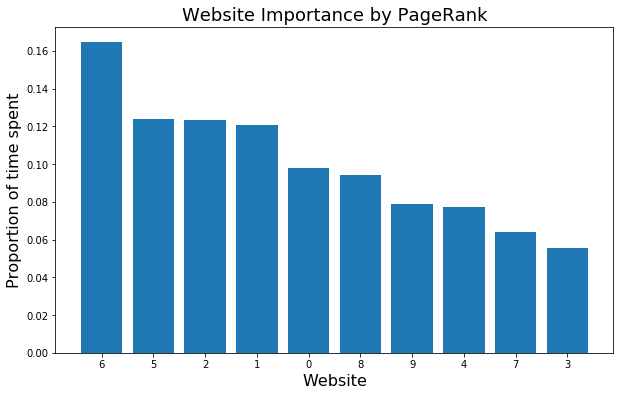

In [16]:
# Modify transition matrix to ensure ergodicity
P_ = 1/9 + (8/9) * P

# Compute eigenvalues and eigenvectors
w,v = np.linalg.eig(P_.T)

# Rearrange eigenvalues and eigenvectors to be in descending order of eigenvalue magnitude
index_order = np.argsort(np.abs(w))[::-1]
w = w[index_order]
v = v[:,index_order]

# Normalize stationary distribution
stationary_dist = np.real(v[:,0])/np.real(sum(v[:,0]))

# Compute pages ranks
page_rank = np.argsort(stationary_dist)[::-1]

# Plot page ranks in descending order of importance
pyplot.figure(figsize=(10,6))
pyplot.bar([str(i) for i in page_rank],np.sort(stationary_dist)[::-1])
pyplot.xlabel('Website',fontsize=16)
pyplot.ylabel('Proportion of time spent',fontsize=16)
pyplot.title('Website Importance by PageRank',fontsize=18)
pyplot.show()

    



In [17]:
# Plot web link visualization with vertex sizes representing website importance
website_graph = { 
                'nodes' : {
                 str(i) : { 'size' : str(500*stationary_dist[i]**3)} for i in range(n)
                    },
                'edges' : [ { 'source' : str(i), 'target' : str(j)} for i,j in zip(rows,cols)]
                }
jgraph.draw(website_graph,shader='lambert')